<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitabase_regression_for_Single_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from glob import glob
import os
import pandas as pd
path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"


#Function

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def get_contenct(patient_folder_adrs):

  post_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
  

  pre_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]

  for i in glob(post_adrs+"/*"):
    if "1min" in i.split("_"):
      post_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      post_cal = i

  for i in glob(pre_adrs+"/*"):
    if "1min" in i.split("_"):
      pre_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      pre_cal = i
 
  return post_1min, post_cal, pre_1min, pre_cal



def plot(X,Y,m,c):
  fig = plt.figure(figsize=(13,8))
  ax = fig.add_subplot()
  fig.subplots_adjust(top=0.85)

  # Set titles for the figure and the subplot respectively
  #fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
  ax.set_title('Max HR',fontweight='bold')

  ax.scatter(X, Y)

  high_y = Y.max()

  high_x = (high_y-c)/m

  rang_y=[Y.min(),high_y]

  ax.plot((rang_y-c)/m, rang_y, color = "red")

  ax.scatter(high_x, high_y, color='green')
  ax.annotate('(aEEMax,HRMax)', xy=(high_x, high_y), xytext=(high_x-5, high_y+10),fontweight='bold')
  ax.annotate("("+str(round(high_x[0],2))+","+str(high_y)+")", xy=(high_x, high_y), xytext=(high_x-3, high_y+5),fontweight='bold',color = 'purple')

  ax.set_xlabel("aEE(kJ/min)",fontweight='bold',fontsize=12)
  ax.set_ylabel("HR(BPM)",fontweight='bold',fontsize=12)

  ax.axis([0, high_x+10, 0, high_y+30])

  ax.grid()
  plt.show()




def reg_post_pre(df_1min, df_cal):
  list_1 = list(df_1min["Time"])
  list_2 = list(df_cal["ActivityMinute"])

  hr = []
  aee = []
  time = []

  if len(list_1)>len(list_2):
    for i in list_1:
      if i in list_2:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  else:
    for i in list_2:
      if i in list_1:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  d={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
  }

  dataFrame = pd.DataFrame.from_dict(d)


  Y = dataFrame["HR(BPM)"].values.reshape(-1, 1)
  X = dataFrame["aEE(kJ/min)"].values.reshape(-1, 1)
  reg = LinearRegression().fit(X, Y)
  m = reg.coef_[0]
  c = reg.intercept_
  plot(X,Y,m,c)
  



def hr_aee_mx(df_1min, df_cal):
  list_1 = list(df_1min["Time"])
  list_2 = list(df_cal["ActivityMinute"])

  hr = []
  aee = []
  time = []

  if len(list_1)>len(list_2):
    for i in list_1:
      if i in list_2:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  else:
    for i in list_2:
      if i in list_1:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  d={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
  }

  dataFrame = pd.DataFrame.from_dict(d)


  Y = dataFrame["HR(BPM)"].values.reshape(-1, 1)
  X = dataFrame["aEE(kJ/min)"].values.reshape(-1, 1)
  reg = LinearRegression().fit(X, Y)
  m = reg.coef_[0]
  c = reg.intercept_
  
  hr_mx = Y.max()
  aee_mx = (hr_mx-c)/m
  return hr_mx, round(aee_mx[0],2)



#Sample Test For Single Subject

In [6]:
sub = '024-DP'

In [7]:

for i in glob(path+"/*"):
  #get_contenct(i)
  if sub in i.split("/"):
    Post_1min, Post_cal, Pre_1min, Pre_cal = get_contenct(i)



In [8]:
df_post_1min = pd.read_csv(Post_1min)
df_post_cal = pd.read_csv(Post_cal)
df_pre_1min = pd.read_csv(Pre_1min)
df_pre_cal = pd.read_csv(Pre_cal)

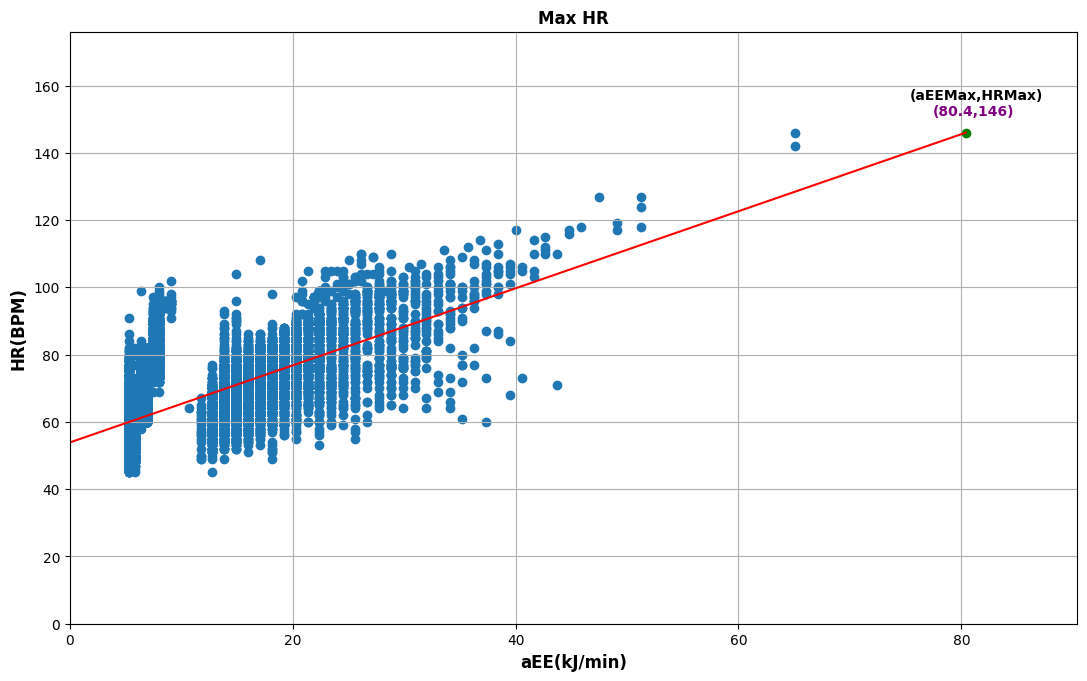

In [9]:
reg_post_pre(df_post_1min,df_post_cal)

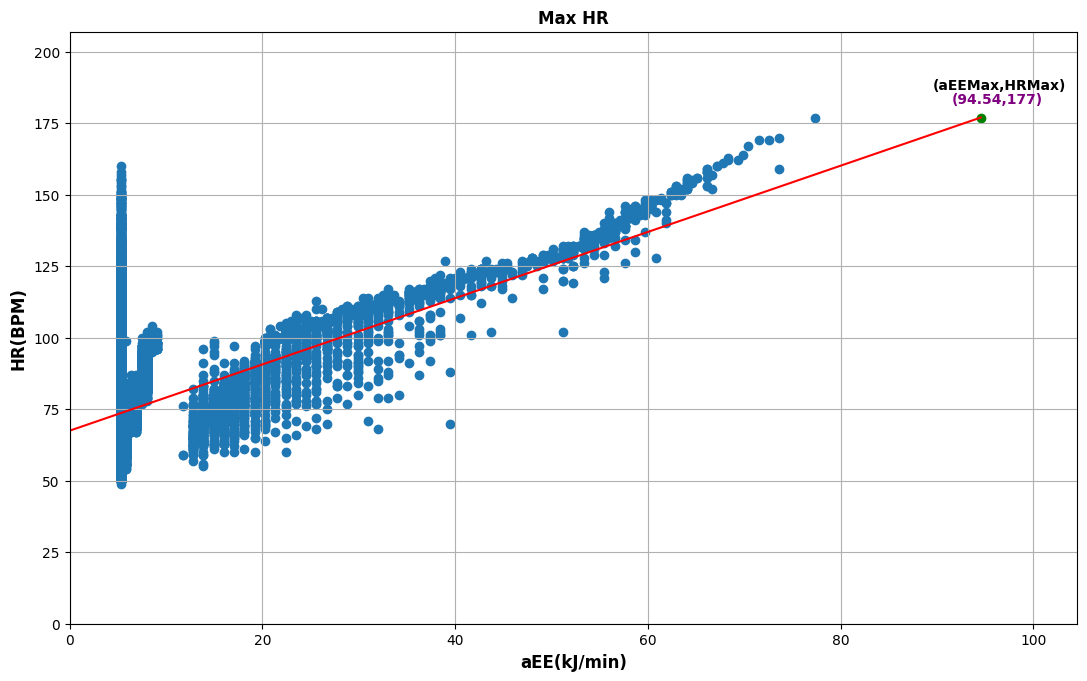

In [10]:
reg_post_pre(df_pre_1min,df_pre_cal)